In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U sentence-transformers > /dev/null

In [ ]:
!pip install bertopic
!pip install bertopic[visualization]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76 kB 169 kB/s 
     |████████████████████████████████| 88 kB 3.2 MB/s 
     |████████████████████████████████| 5.2 MB 38.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 636 kB 58.7 MB/s 
     |████████████████████████████████| 1.1 MB 25.5 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342152 sha256=1b58a4126f1418c413a917e825cb98a4f3e6c2f593972c583833ad5b715a4940
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=6fb62056773001f73e5308c945c8a0aa67c7603451731f671e8ea61baa7d5203
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1f

In [ ]:
!ls 'drive/MyDrive/Colab Notebooks/nlp/clustering kpa'

 10_legal_pegasus_sum_berttopic.ipynb
'11_legal_pegasus_rephrase results.ipynb'
 12_ngrams.ipynb
 1_KPA_clustering.ipynb
 2_KPA_clustering_fine-tunning.ipynb
 3_legal_clustering.ipynb
 4_legal_barh_clustering.ipynb
 5_legal_clustering_legal_bert.ipynb
 6_legal_clustering_topic_bert.ipynb
 7_explore_final.ipynb
 8_pegasus_sum_berttopic.ipynb
 9_gensim_sum_berttopic.ipynb
 abstractive_summarization_bertsumabs_cnndm.ipynb
 abstractive_summarization_minilm_cnndm.ipynb
 data


In [ ]:
import json
import sklearn
import sklearn.model_selection
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [ ]:
random_state = 321

# BERTopic

In [ ]:
from bertopic import BERTopic

In [ ]:
model = BERTopic()

# Toy dataset from BERTopic

In [ ]:
from sklearn.datasets import fetch_20newsgroups

docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

In [ ]:
len(docs)

18846

In [ ]:
docs[0]

"\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

# Train/Dev/Test split

In [ ]:
legal_data = pd.read_pickle('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/echr_arguments_clustered_legal_bert.pkl')

In [ ]:
legal_data

,id,argument,embedding,tsne_30_x,tsne_30_y,cluster_id,argument_id
0,1,The Commission notes that the applicant was de...,"[-0.54420865, 0.10708204, -0.33214608, -0.1024...",-20.717447,-56.532124,16,1
1,2,He was released after the Court of Appeal revi...,"[-0.3446362, -0.1886111, 0.15328027, -0.357862...",-23.226044,-55.705254,16,2
2,3,Article 5 para. 1 (Art. 5-1) of the Conventio...,"[-0.595209, -0.112412356, 0.103474185, 0.03031...",40.096104,44.235756,13,3
3,4,The Commission finds that the applicant was de...,"[-0.7030391, -0.21792084, 0.17640072, -0.08939...",39.492611,41.208103,13,4
4,5,The Commission also finds no evidence in the c...,"[-0.6256406, -0.08068405, -0.09766886, -0.1367...",45.119465,31.979721,13,5
...,...,...,...,...,...,...,...
1946,1947,In its report referred to in paragraph 4 of t...,"[-0.056232963, -0.13105752, -0.11231604, 0.023...",-24.839153,-23.512186,10,1947
1947,1948,"In sum, I have not been convinced that the ap...","[-0.3613575, 0.4707607, -0.31618902, -0.006823...",-34.731556,-20.958765,10,1948
1948,1949,It follows that neither have I been convinced ...,"[-0.60589075, 0.2530642, -0.24739389, -0.11263...",-31.148493,-37.791576,19,1949
1949,1950,(see the Guzzardi v. Italy judgment of 6 Novem...,"[-0.8097613, 0.031185085, 0.6104468, -0.700908...",112.355484,4.641927,6,1950


# LEGAL BERT

In [ ]:
# from sentence_transformers import SentenceTransformer, util
# model = SentenceTransformer('nlpaueb/bert-base-uncased-echr')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

No sentence-transformers model found with name /root/.cache/torch/sentence_transformers/nlpaueb_bert-base-uncased-echr. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/nlpaueb_bert-base-uncased-echr were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initial

# Try BERTopic

In [ ]:
legal_data['argument'].tolist()

["The Commission notes that the applicant was detained after having been sentenced by the first instance court to 18 months' imprisonment.",
 "He was released after the Court of Appeal reviewed this sentence, reducing it to 15 months' imprisonment, convertible to a fine.",
 ' Article 5 para. 1 (Art. 5-1) of the Convention guarantees the right to liberty and security of person, subject to certain exceptions, such as the lawful detention of a person after conviction by a competent court, within the meaning of sub-paragraph (a) of the provision.',
 'The Commission finds that the applicant was deprived of his liberty "after conviction by a competent court" within the meaning of Article 5 para. 1 (a) (Art. 5-1-a) of the Convention.\r',
 'The Commission also finds no evidence in the case to suggest an infringement of paragraphs 3 and 4 of Article 5 (Art. 5-3, 5-4):',
 'The applicant was not detained on remand prior to his trial and the judicial control of the lawfulness of his subsequent det

In [ ]:
topics, probabilities = model.fit_transform(legal_data['argument'].tolist())

In [ ]:
len(topics)

1951

In [ ]:
legal_data['topic_pred'] = topics
legal_data.head()

,id,argument,embedding,tsne_30_x,tsne_30_y,cluster_id,argument_id,topic_pred
0,1,The Commission notes that the applicant was de...,"[-0.54420865, 0.10708204, -0.33214608, -0.1024...",-20.717447,-56.532124,16,1,-1
1,2,He was released after the Court of Appeal revi...,"[-0.3446362, -0.1886111, 0.15328027, -0.357862...",-23.226044,-55.705254,16,2,38
2,3,Article 5 para. 1 (Art. 5-1) of the Conventio...,"[-0.595209, -0.112412356, 0.103474185, 0.03031...",40.096104,44.235756,13,3,10
3,4,The Commission finds that the applicant was de...,"[-0.7030391, -0.21792084, 0.17640072, -0.08939...",39.492611,41.208103,13,4,2
4,5,The Commission also finds no evidence in the c...,"[-0.6256406, -0.08068405, -0.09766886, -0.1367...",45.119465,31.979721,13,5,-1


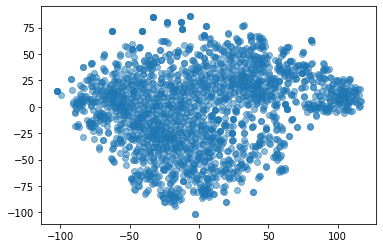

In [ ]:
plt.scatter(legal_data['tsne_30_x'], legal_data['tsne_30_y'], alpha=.5)

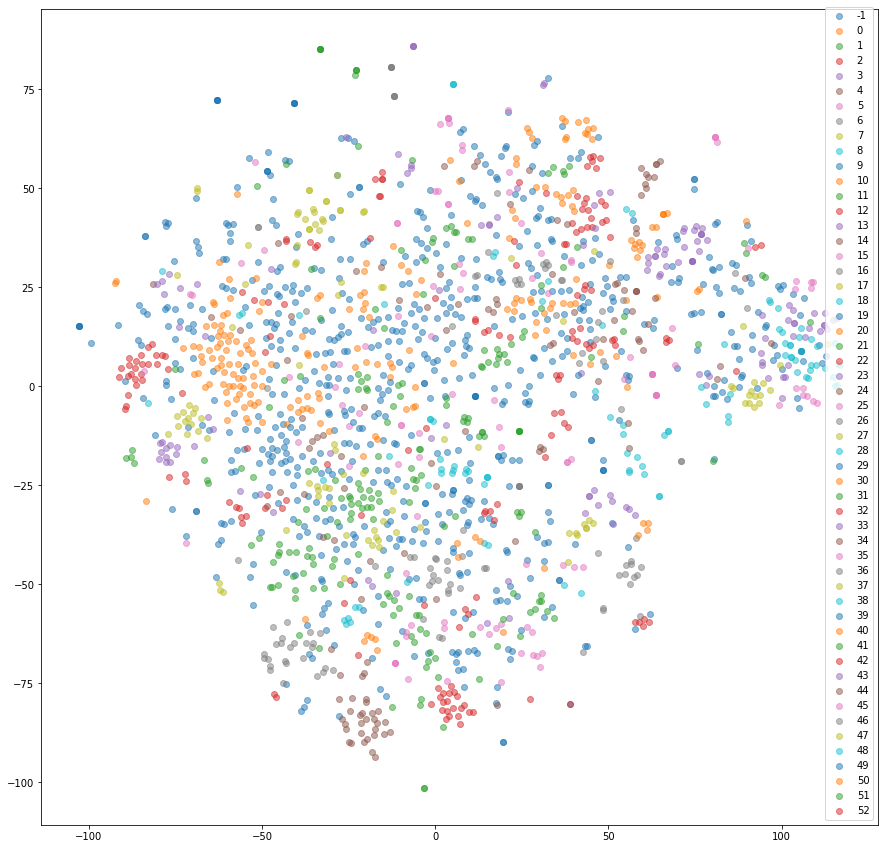

In [ ]:
plt.figure(figsize=(15,15))
for i,group in legal_data.groupby('topic_pred'):
  plt.scatter(group['tsne_30_x'], group['tsne_30_y'], alpha=.5, label = i)
plt.legend(loc='lower right')

In [ ]:
model.visualize_topics()

# 8 Topics

In [ ]:
model = BERTopic(nr_topics=8)
topics, probabilities = model.fit_transform(legal_data['argument'].tolist())
model.visualize_topics()

# Auto topic reduction

In [ ]:
model = BERTopic(nr_topics="auto")
topics, probabilities = model.fit_transform(legal_data['argument'].tolist())
model.visualize_topics()

# Using legal embeddings

In [ ]:
model = BERTopic()
topics, probabilities = model.fit_transform(legal_data['argument'].tolist(),np.stack(legal_data['embedding']))
model.visualize_topics()

# 9 Topics

In [ ]:
model = BERTopic(nr_topics=9)
topics, probabilities = model.fit_transform(legal_data['argument'].tolist(),np.stack(legal_data['embedding']))
model.visualize_topics()

# Auto topic reduction

In [ ]:
model = BERTopic(nr_topics="auto")
topics, probabilities = model.fit_transform(legal_data['argument'].tolist(),np.stack(legal_data['embedding']))
model.visualize_topics()

In [ ]:
legal_data['topic_pred'] = topics
legal_data.head()

,id,argument,embedding,tsne_30_x,tsne_30_y,cluster_id,argument_id,topic_pred
0,1,The Commission notes that the applicant was de...,"[-0.54420865, 0.10708204, -0.33214608, -0.1024...",-20.717447,-56.532124,16,1,-1
1,2,He was released after the Court of Appeal revi...,"[-0.3446362, -0.1886111, 0.15328027, -0.357862...",-23.226044,-55.705254,16,2,33
2,3,Article 5 para. 1 (Art. 5-1) of the Conventio...,"[-0.595209, -0.112412356, 0.103474185, 0.03031...",40.096104,44.235756,13,3,5
3,4,The Commission finds that the applicant was de...,"[-0.7030391, -0.21792084, 0.17640072, -0.08939...",39.492611,41.208103,13,4,5
4,5,The Commission also finds no evidence in the c...,"[-0.6256406, -0.08068405, -0.09766886, -0.1367...",45.119465,31.979721,13,5,-1


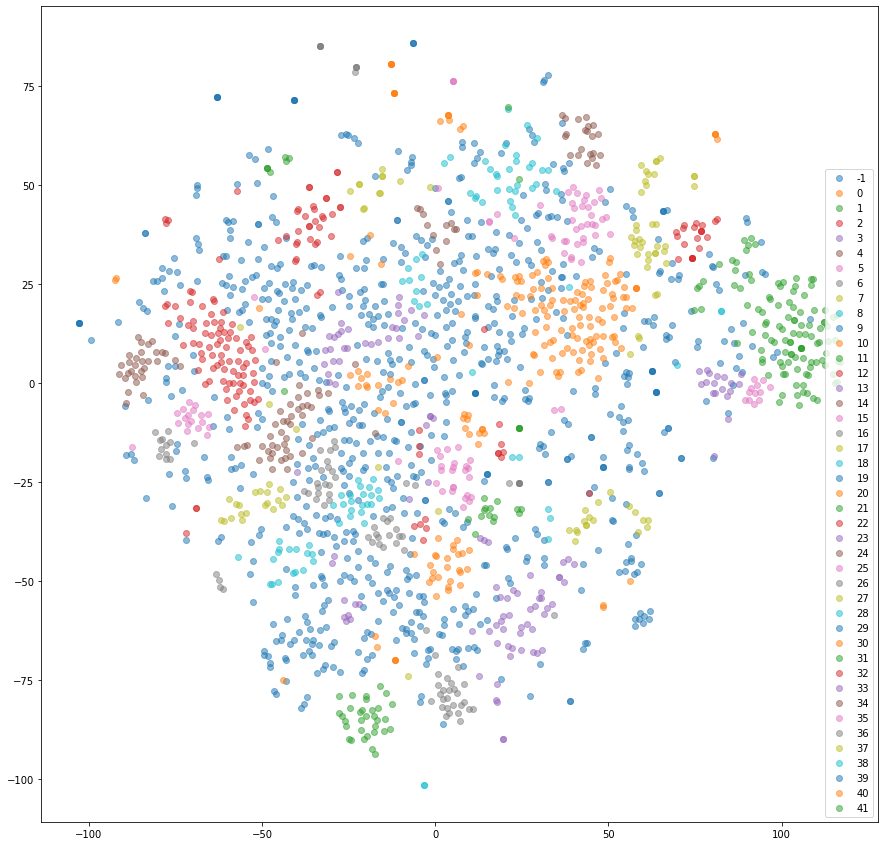

In [ ]:
plt.figure(figsize=(15,15))
for i,group in legal_data.groupby('topic_pred'):
  plt.scatter(group['tsne_30_x'], group['tsne_30_y'], alpha=.5, label = i)
plt.legend(loc='lower right')

In [ ]:
model.get_topic(0)

[('art', 0.04921568081389281),
 ('article', 0.044257112475304373),
 ('61', 0.02780586177542484),
 ('convention', 0.02763862522662379),
 ('para', 0.025689458459868655),
 ('under', 0.022348692293687262),
 ('the', 0.02231309019734812),
 ('of', 0.020161658587716586),
 ('that', 0.019935440716069102),
 ('10', 0.017654554933422526)]

In [ ]:
model.visualize_hierarchy()

In [ ]:
model.visualize_barchart()

# Save data

In [ ]:
legal_data.head()

,id,argument,embedding,tsne_30_x,tsne_30_y,cluster_id,argument_id,topic_pred
0,1,The Commission notes that the applicant was de...,"[-0.54420865, 0.10708204, -0.33214608, -0.1024...",-20.717447,-56.532124,16,1,-1
1,2,He was released after the Court of Appeal revi...,"[-0.3446362, -0.1886111, 0.15328027, -0.357862...",-23.226044,-55.705254,16,2,33
2,3,Article 5 para. 1 (Art. 5-1) of the Conventio...,"[-0.595209, -0.112412356, 0.103474185, 0.03031...",40.096104,44.235756,13,3,5
3,4,The Commission finds that the applicant was de...,"[-0.7030391, -0.21792084, 0.17640072, -0.08939...",39.492611,41.208103,13,4,5
4,5,The Commission also finds no evidence in the c...,"[-0.6256406, -0.08068405, -0.09766886, -0.1367...",45.119465,31.979721,13,5,-1


In [ ]:
legal_data = legal_data.drop(columns=['cluster_id'])

In [ ]:
legal_data.shape

(1951, 7)

In [ ]:
legal_data.to_csv('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/echr_arguments_clustered_legal_bert_berttopic.csv')

In [ ]:
legal_data.to_pickle('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/echr_arguments_clustered_legal_bert_berttopic.pkl')

In [ ]:
pd.read_csv('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/echr_arguments_clustered_legal_bert_berttopic.csv').shape

(2022, 8)

In [ ]:
pd.read_pickle('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/echr_arguments_clustered_legal_bert_berttopic.pkl').shape

(1951, 7)